# Problem Statement

The Level 1 of the Cognifyz Data Science Internship, focuses on the exploration and analysis of a restaurant dataset. The level comprises the Data Exploration and Preprocessing, Descriptive Analysis, and Geospatial Analysis

# Task 1: Data Exploration and Preprocessing

In [11]:
import pandas as pd 
import numpy as np

#visualization Libraries 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
#dataset Loading

df=pd.read_csv('Dataset .csv')

In [13]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
print("No of rows:",df.shape[0])
print("No of colms:",df.shape[1])

No of rows: 9551
No of colms: 21


In [10]:
dup=df.duplicated().sum()
print(f'no of duplicated rows are{dup}')

no of duplicated rows are0


In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

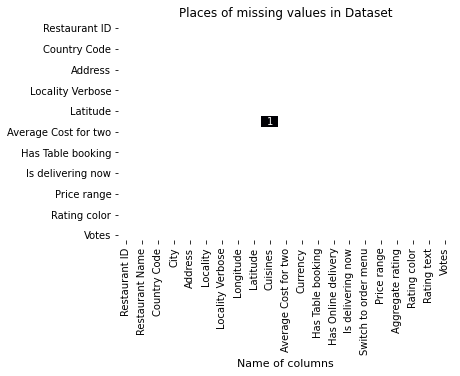

In [15]:
sns.heatmap(df.isnull().corr(),cmap = 'magma', cbar = False, annot= True);
plt.xlabel('Name of columns', fontsize=11);
plt.title('Places of missing values in Dataset', fontsize=12);

In [17]:
df = df.dropna(subset=['Cuisines'])

In [18]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [20]:
#Distribution of The Target Variable

# Distribution of the target variable ("Aggregate rating") and identify class imbalance

target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


# Task 2: Descriptive Analysis

In [5]:
# Basic statistical measures (mean, median, standard deviation, etc.) for numerical columns
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
# Individual statistics
# Calculate mean for numerical columns
numeric_columns = df.select_dtypes(include=['int', 'float'])
mean = numeric_columns.mean()
print(f"Mean for numerical columns:\n{mean}")

Mean for numerical columns:
Longitude           64.126574
Latitude            25.854381
Aggregate rating     2.666370
dtype: float64


In [7]:
# Calculate median for numerical columns
median = numeric_columns.median()
print(f"\nMedian for numerical columns:\n{median}")


Median for numerical columns:
Longitude           77.191964
Latitude            28.570469
Aggregate rating     3.200000
dtype: float64


In [8]:
# Calculate standard deviation for numerical columns
std_dev = numeric_columns.std()
print(f"\nStandard deviation for numerical columns:\n{std_dev}")


Standard deviation for numerical columns:
Longitude           41.467058
Latitude            11.007935
Aggregate rating     1.516378
dtype: float64


# Distribution of Categorical Variables

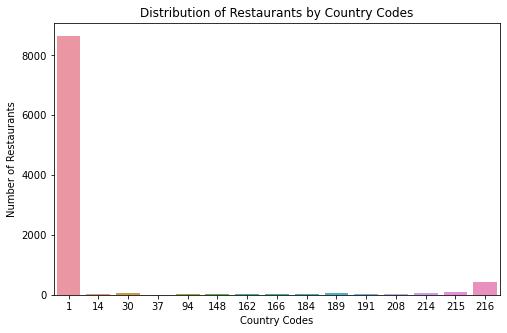

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x = df['Country Code'])

plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

plt.show()

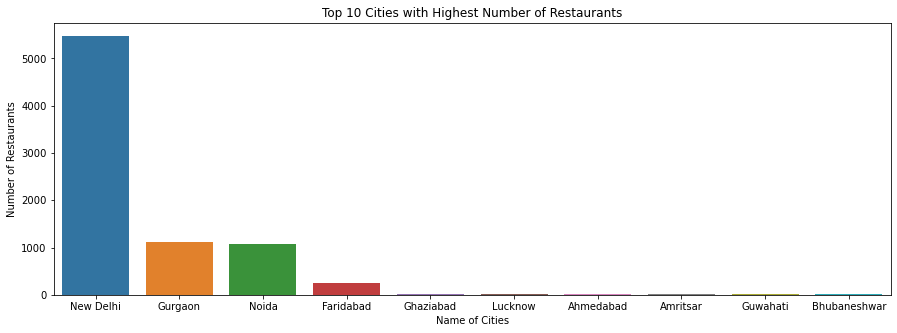

In [11]:
plt.figure(figsize=(15,5))

sns.countplot(x = df['City'], order=df.City.value_counts().iloc[:10].index)
plt.xlabel('Name of Cities')
plt.ylabel('Number of Restaurants')

plt.title('Top 10 Cities with Highest Number of Restaurants')

plt.show()

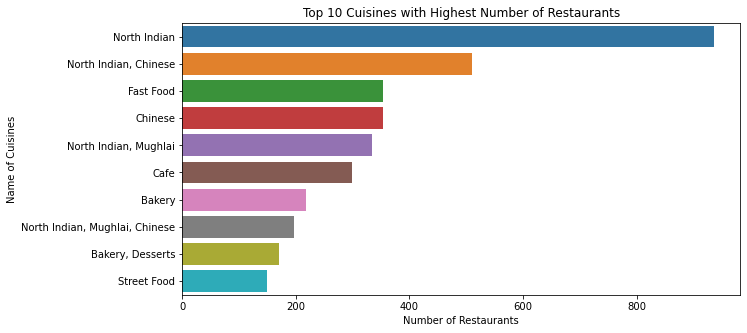

In [12]:
plt.figure(figsize=(10, 5))

sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

plt.show()

# Top Cuisines and Cities

In [13]:
top_cuisines = df['Cuisines'].value_counts().head(10)

print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [14]:
top_cities = df['City'].value_counts().head(10)

print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Bhubaneshwar      21
Name: City, dtype: int64


# Task 3: Geospatial Analysis

# Visualize Locations of Restaurants

In [6]:
!pip install shapely

In [8]:
!pip install geopandas

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


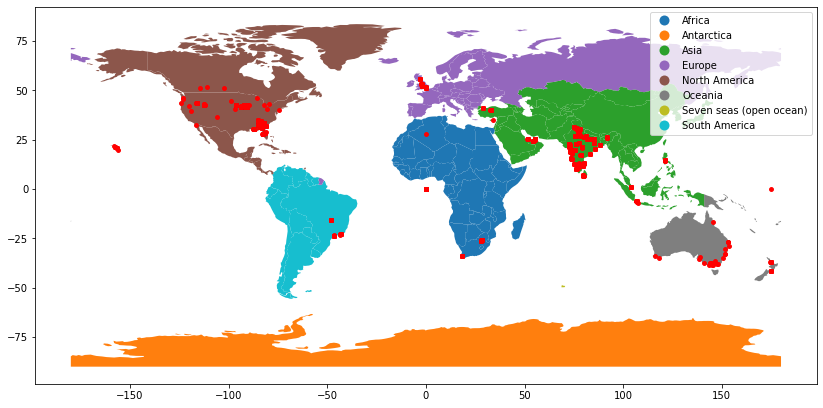

In [14]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

plt.show()


# Distribution of Restaurants by City

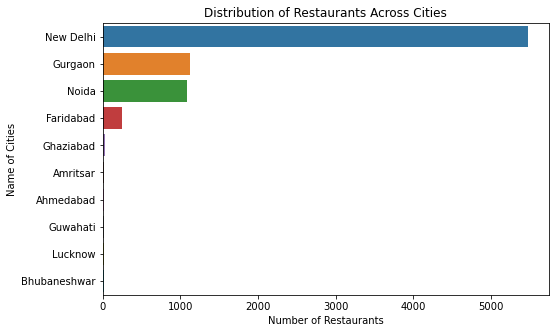

In [15]:
plt.figure(figsize=(8, 5))

sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')
plt.show()

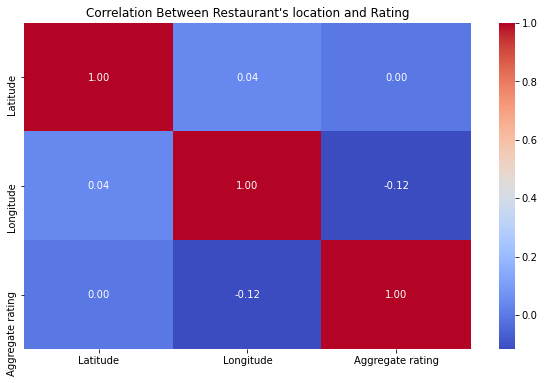

In [16]:
plt.figure(figsize=(10, 6))

correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Restaurant's location and Rating")
plt.show()